# Ucitavanje podataka i analiza podataka

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('bank-additional.csv', sep=';')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64.0,2.0,999,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528.0,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

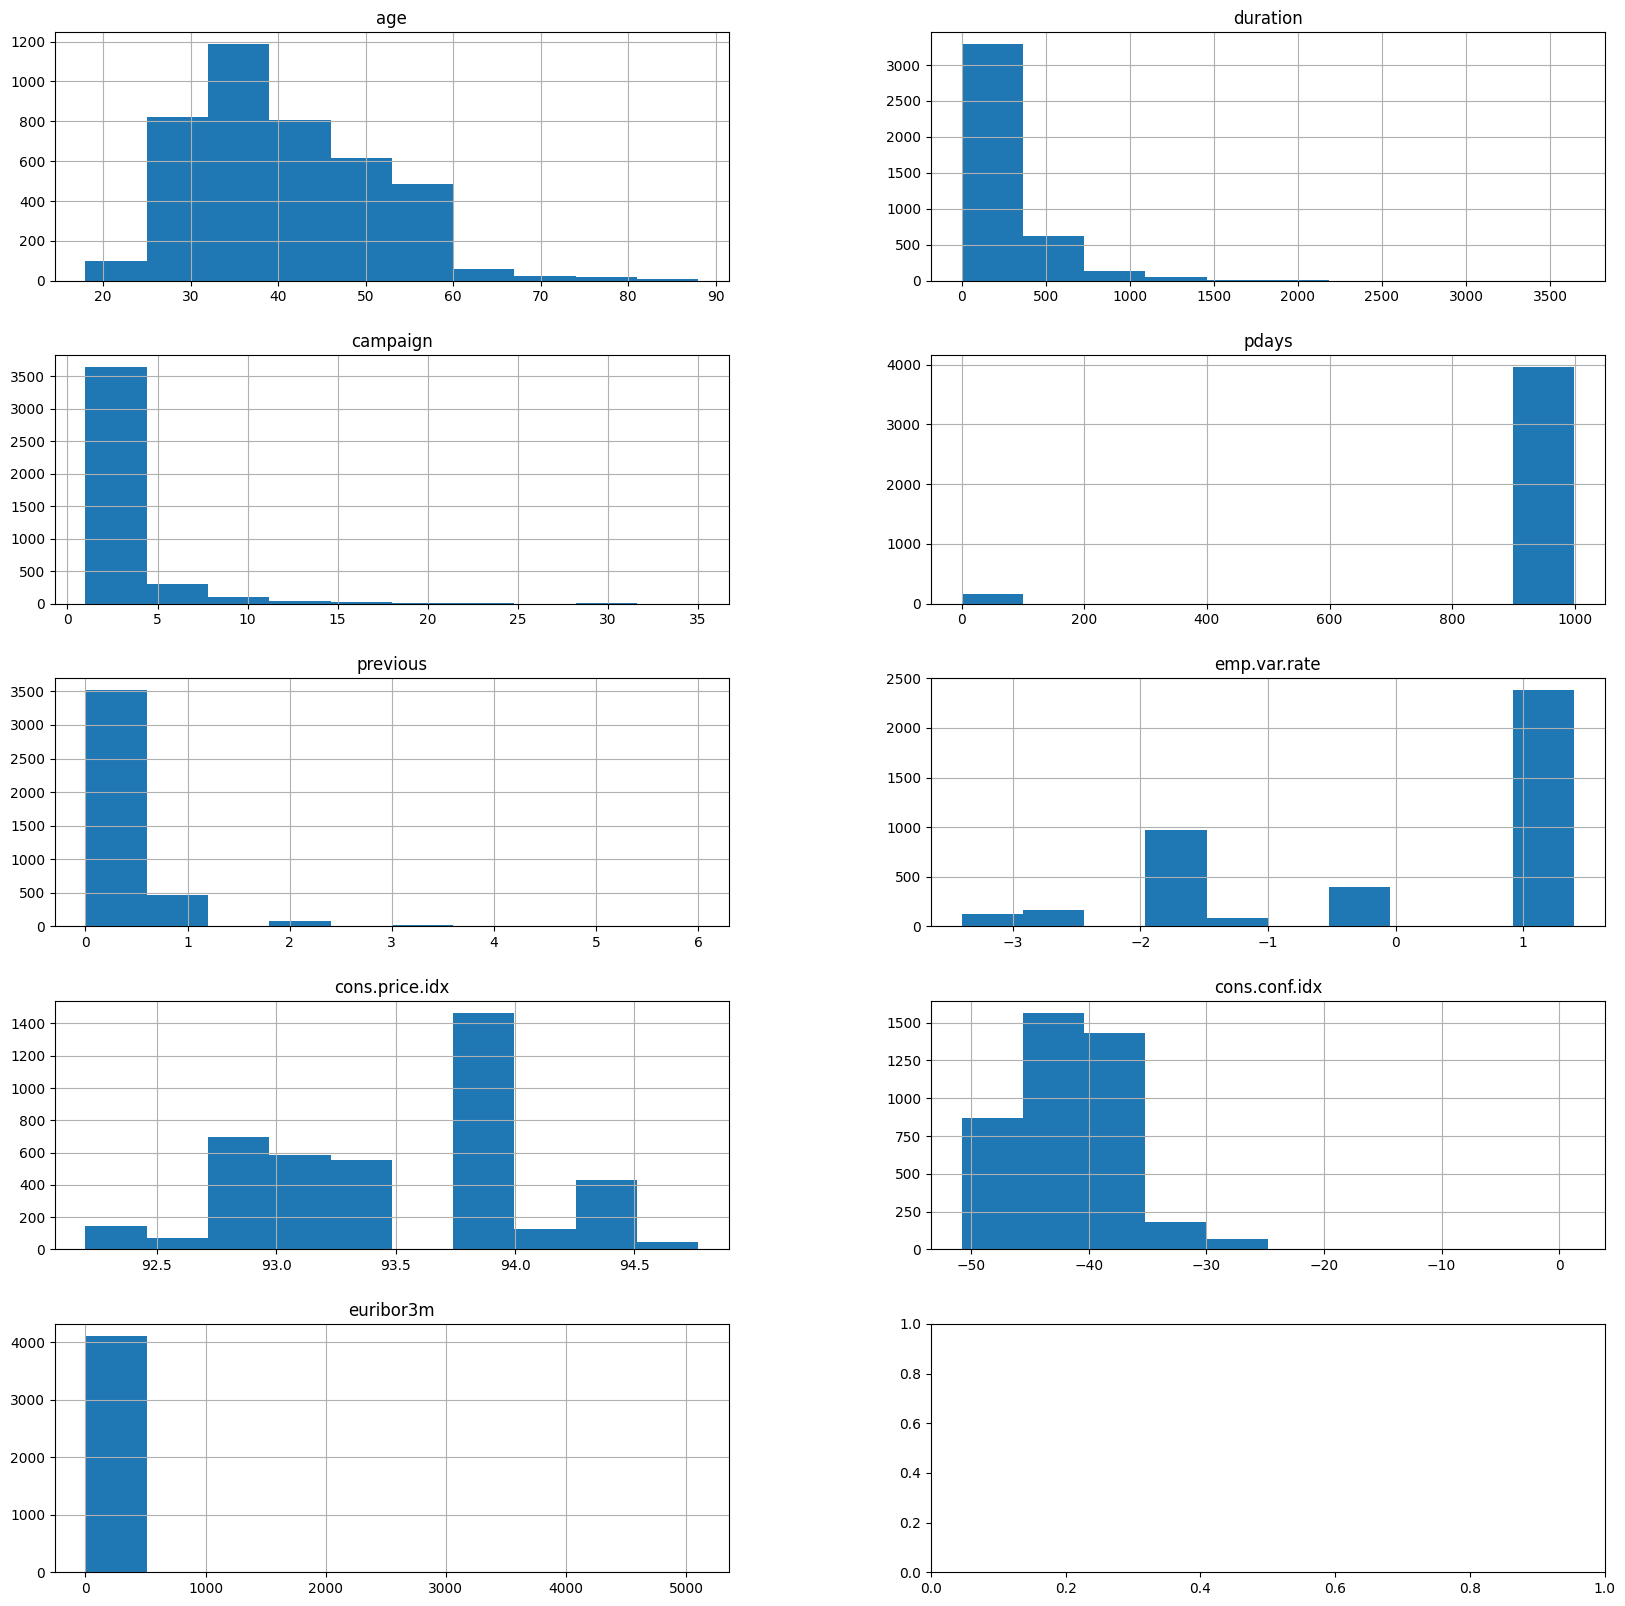

In [7]:
fig, axes = plt.subplots(5,2)
fig.set_figheight(20)
fig.set_figwidth(20)
df.hist('age', ax=axes[0,0])
df.hist('duration', ax=axes[0,1])
df.hist('campaign', ax=axes[1,0])
df.hist('pdays', ax=axes[1,1])
df.hist('previous', ax=axes[2,0])
df.hist('emp.var.rate', ax=axes[2,1])
df.hist('cons.price.idx', ax=axes[3,0])
df.hist('cons.conf.idx', ax=axes[3,1])
df.hist('euribor3m', ax=axes[4,0])

plt.show()

In [8]:
df['previous'].value_counts()

0.0    3521
1.0     475
2.0      78
3.0      25
4.0      14
5.0       2
6.0       2
Name: previous, dtype: int64

In [9]:
df['pdays'].value_counts()

999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: pdays, dtype: int64

# Deskriptivna statistika

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [11]:
df.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


In [12]:
pivot = df.pivot_table(values = ['age', 'duration'], index = ['education'], aggfunc='median')
pivot

,age,duration
education,,
basic.4y,48,170.0
basic.6y,39,193.5
basic.9y,38,177.0
high.school,36,180.0
illiterate,42,146.0
professional.course,38,199.0
university.degree,36,177.0
unknown,41,210.0


# Matrica korelacija

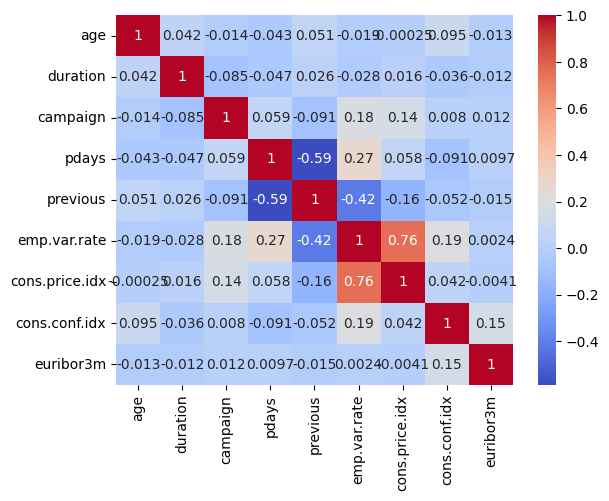

<Figure size 1000x1000 with 0 Axes>

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.figure(figsize=(10, 10))
plt.show()

# Popunjavanje nedostajucih vrednosti

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

In [16]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(df.loc[:, ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])
df.loc[:, ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']] = imputer.transform(df.loc[:, ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])

In [17]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       1
y                 1
dtype: int64

In [18]:
df[df['nr.employed']=='no']

# neobican podatak, nr.employed bi morala da nbude numericka vrednost jer predstavlja broj zaposlenih
# ova instanca za tu vrednost ima 'no', kao i ciljani atribut NaN - ovaj red cemo ukloniti

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,80.0,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [19]:
df = df.drop(780)

In [20]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64.0,2.0,999,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528.0,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [21]:
df['nr.employed']=df['nr.employed'].astype('float64')

In [22]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [23]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4117.000000
mean,40.115590,256.911998,2.533917,960.412822,0.190476,0.085152,93.579707,-40.496497,3.621926,5166.483094
std,10.313839,254.687104,2.565324,191.945151,0.541830,1.562705,0.579272,4.593404,1.733412,73.672054
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       1
y                 0
dtype: int64

In [25]:
df[df['nr.employed'].isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
437,42,self-employed,married,university.degree,no,no,no,cellular,jul,mon,84.0,2.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.962,NaN,no


In [26]:
df.loc[437,'nr.employed']=5166.483094

In [27]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [28]:
df['contact'].value_counts()

cellular     2651
telephone    1467
Name: contact, dtype: int64

In [29]:
df['job'].value_counts()

admin.           1012
blue-collar       883
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

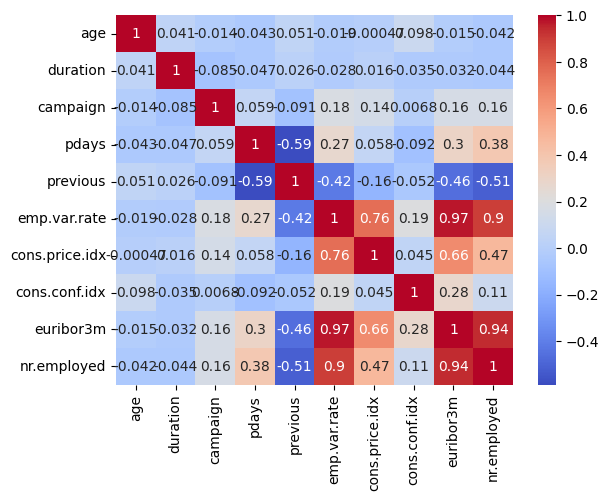

<Figure size 800x600 with 0 Axes>

In [30]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.figure(figsize=(8, 6))
plt.show()

In [31]:
df = df.drop('euribor3m', axis=1)

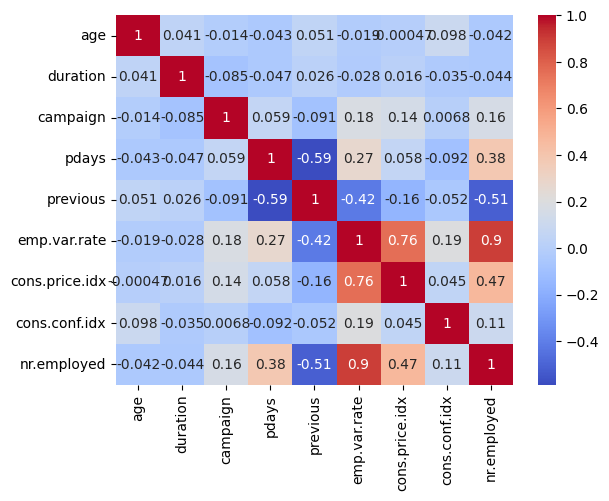

<Figure size 800x600 with 0 Axes>

In [32]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.figure(figsize=(8, 6))
plt.show()

In [33]:
df = df.drop(['emp.var.rate'], axis=1)

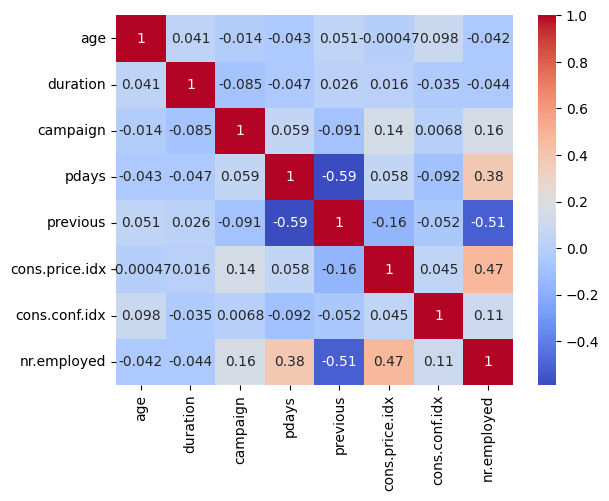

<Figure size 800x600 with 0 Axes>

In [34]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.figure(figsize=(8, 6))
plt.show()

# Encoding - kvantifikovanje kategorickih podataka

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [36]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [37]:
X.shape

(4118, 18)

In [38]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
cons.price.idx    float64
cons.conf.idx     float64
nr.employed       float64
y                  object
dtype: object

In [39]:
indices = list(range(1,10))+[14]

In [40]:
df['default'].value_counts()

no         3314
unknown     803
yes           1
Name: default, dtype: int64

In [41]:
df.iloc[:,indices]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent
4116,student,single,high.school,no,no,no,cellular,may,mon,failure
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent


In [42]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), indices)], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [43]:
df['job'].value_counts()

admin.           1012
blue-collar       883
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
print(y)

[0 0 0 ... 0 0 0]


# Podela podataka na trening i test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Klasifikacija

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix

In [49]:
np.isnan(X).sum()

0

In [50]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [51]:
def print_performance(y, y_hat):
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')

In [52]:
# kvalitet modela na trening skupu

y_hat = model1.predict(X_train)

print_performance(y_train, y_hat)

confusion_matrix(y_train, y_hat)

Accuracy: 0.914996964177292
Precision: 0.6814159292035398
Recall: 0.425414364640884
F1: 0.5238095238095238


array([[2860,   72],
       [ 208,  154]], dtype=int64)

In [53]:
# kvalitet modela na test skupu

y_hat = model1.predict(X_test)

print_performance(y_test, y_hat)

confusion_matrix(y_test, y_hat)

Accuracy: 0.9101941747572816
Precision: 0.631578947368421
Recall: 0.4044943820224719
F1: 0.4931506849315069


array([[714,  21],
       [ 53,  36]], dtype=int64)

In [54]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [55]:
y_hat2 = model2.predict(X_test)

print_performance(y_test, y_hat2)

confusion_matrix(y_test, y_hat2)

Accuracy: 0.8616504854368932
Precision: 0.38738738738738737
Recall: 0.48314606741573035
F1: 0.43


array([[667,  68],
       [ 46,  43]], dtype=int64)

In [56]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_hat3 = model3.predict(X_test)

print_performance(y_test, y_hat3)

confusion_matrix(y_test, y_hat3)

Accuracy: 0.8907766990291263
Precision: 0.4935064935064935
Recall: 0.42696629213483145
F1: 0.4578313253012048


array([[696,  39],
       [ 51,  38]], dtype=int64)

In [58]:
model4 = DecisionTreeClassifier(max_depth=10, max_features=5)
model4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=5)

In [59]:
y_hat4 = model4.predict(X_test)

print_performance(y_test, y_hat4)

confusion_matrix(y_test, y_hat4)

Accuracy: 0.8968446601941747
Precision: 0.5344827586206896
Recall: 0.34831460674157305
F1: 0.42176870748299317


array([[708,  27],
       [ 58,  31]], dtype=int64)

In [60]:
model5 = DecisionTreeClassifier(max_depth=5)
model5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [61]:
y_hat5 = model5.predict(X_test)

print_performance(y_test, y_hat5)

confusion_matrix(y_test, y_hat5)

Accuracy: 0.8980582524271845
Precision: 0.5373134328358209
Recall: 0.4044943820224719
F1: 0.4615384615384615


array([[704,  31],
       [ 53,  36]], dtype=int64)

# Validacija modela

In [62]:
from sklearn.model_selection import KFold

In [63]:
folds = KFold(n_splits=10)

results = []
for train_index, test_index in folds.split(X):
    X_train, y_train  = X[train_index, :], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    model1.fit(X_train, y_train)
    
    y_hat = model1.predict(X_test)
    results.append(accuracy_score(y_test, y_hat))
    print(f'Accuracy: {accuracy_score(y_test, y_hat)}')
    print(f'F: {f1_score(y_test, y_hat)}')

Accuracy: 0.912621359223301
F: 0.4375
Accuracy: 0.9199029126213593
F: 0.5925925925925924
Accuracy: 0.9223300970873787
F: 0.40740740740740744
Accuracy: 0.9199029126213593
F: 0.5352112676056338
Accuracy: 0.9101941747572816
F: 0.5647058823529413
Accuracy: 0.9150485436893204
F: 0.5205479452054795
Accuracy: 0.8883495145631068
F: 0.41025641025641024
Accuracy: 0.9150485436893204
F: 0.5977011494252874
Accuracy: 0.9075425790754258
F: 0.4722222222222222
Accuracy: 0.9172749391727494
F: 0.41379310344827586


In [64]:
f'Tačnost iznosi {round(np.mean(results) * 100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tačnost iznosi 91.28% +/- 0.92%'

In [65]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results) * 100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tačnost iznosi 91.16% +/- 0.81%'

# AUC

In [66]:
y_hat = model1.predict_proba(X)

y_hat

array([[0.87478485, 0.12521515],
       [0.95329986, 0.04670014],
       [0.96370144, 0.03629856],
       ...,
       [0.97350981, 0.02649019],
       [0.84031439, 0.15968561],
       [0.97248298, 0.02751702]])

In [67]:
results = pd.DataFrame({'Stvarno' : y, 'Predvidjeno' : y_hat[:,1]})

results.head(10)

,Stvarno,Predvidjeno
0,0,0.125215
1,0,0.046700
2,0,0.036299
3,0,0.008552
4,0,0.017367
5,0,0.335026
6,0,0.400407
7,0,0.010598
8,0,0.017924
9,0,0.048526


In [68]:
accuracy_score(y, np.repeat(0, len(y)))

0.8904808159300631

In [69]:
y_hat = model1.predict(X)

print('FUNKCIJA PREDICT')
print(f'Accuracy: {accuracy_score(y, y_hat)}')
print(f'Precision: {precision_score(y, y_hat)}')
print(f'Recall: {recall_score(y, y_hat)}')
print(f'F1: {f1_score(y, y_hat)}')
print('-------------------------------')

y_hat = model1.predict_proba(X)[:, 1] >= 0.7
print('NAŠA FUNKCIJA PREDICT')
print(f'Accuracy: {accuracy_score(y, y_hat)}')
print(f'Precision: {precision_score(y, y_hat)}')
print(f'Recall: {recall_score(y, y_hat)}')
print(f'F1: {f1_score(y, y_hat)}')

FUNKCIJA PREDICT
Accuracy: 0.912821758135017
Precision: 0.6691176470588235
Recall: 0.4035476718403548
F1: 0.5034578146611342
-------------------------------
NAŠA FUNKCIJA PREDICT
Accuracy: 0.9091792132102963
Precision: 0.7361963190184049
Recall: 0.2660753880266075
F1: 0.3908794788273615


In [70]:
y_hat = model1.predict(X)

In [71]:
print_performance(y, y_hat)

Accuracy: 0.912821758135017
Precision: 0.6691176470588235
Recall: 0.4035476718403548
F1: 0.5034578146611342


In [72]:
confusion_matrix(y_test, model1.predict(X_test))

array([[365,   9],
       [ 25,  12]], dtype=int64)

In [73]:
y_hat = model1.predict_proba(X)[:, 1] >= 0.7

confusion_matrix(y_test, model1.predict_proba(X_test)[:, 1] >= 0.7)


array([[370,   4],
       [ 29,   8]], dtype=int64)

In [74]:
print_performance(y, y_hat)

Accuracy: 0.9091792132102963
Precision: 0.7361963190184049
Recall: 0.2660753880266075
F1: 0.3908794788273615


In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, model1.predict_proba(X)[:, 1])

0.9196168620832897

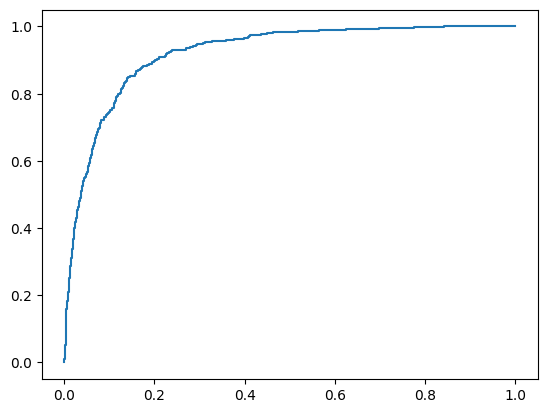

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

model = LogisticRegression()
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

# Klasterovanje

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
pd.options.mode.chained_assignment = None  # default='warn'

In [78]:
df = pd.read_csv('bank-additional.csv', sep=';')

### Priprema podataka

In [79]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [80]:
# bank = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
# bank.head()
# bank['age'].describe()
# bank['age_bin'] = pd.cut(bank['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90],
#                         labels=['0-20', '20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
# bank.head()
# bank.drop('age', inplace=True, axis=1)
# bank.head()
# bank.info()
# le = LabelEncoder()
# bank = bank.apply(le.fit_transform)
# bank.head()

In [81]:
df = df.drop(780)

df['nr.employed'] = df['nr.employed'].astype('float64')

df = df.select_dtypes(exclude='object')

df.dropna(inplace=True)


In [82]:
df.shape

(4098, 10)

### Normalizacija vrednosti


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [85]:
df_norm = scaler.transform(df)

df_norm = pd.DataFrame(df_norm, columns = df.columns)

df_norm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.171429,0.133681,0.029412,1.0,0.0,0.333333,0.269680,0.192469,0.153741,0.512287
1,0.300000,0.094977,0.088235,1.0,0.0,0.937500,0.698753,0.602510,0.956916,0.859735
2,0.100000,0.062311,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.981179,1.000000
3,0.285714,0.004666,0.058824,1.0,0.0,1.000000,0.882307,0.376569,0.980499,1.000000
4,0.414286,0.015921,0.000000,1.0,0.0,0.687500,0.389322,0.368201,0.806349,0.877883


In [86]:
df_norm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000
mean,0.316091,0.070509,0.045180,0.961186,0.031845,0.725349,0.536816,0.430854,0.676527,0.766785
std,0.147268,0.070006,0.075573,0.192587,0.090477,0.325894,0.225959,0.192326,0.393239,0.278461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.028273,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.158503,0.512287
50%,0.285714,0.049684,0.029412,1.000000,0.000000,0.937500,0.603274,0.376569,0.957370,0.859735
75%,0.414286,0.087222,0.058824,1.000000,0.000000,1.000000,0.698753,0.602510,0.980952,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Iznalaženje outlier vrednosti

In [87]:
import matplotlib.pyplot as plt

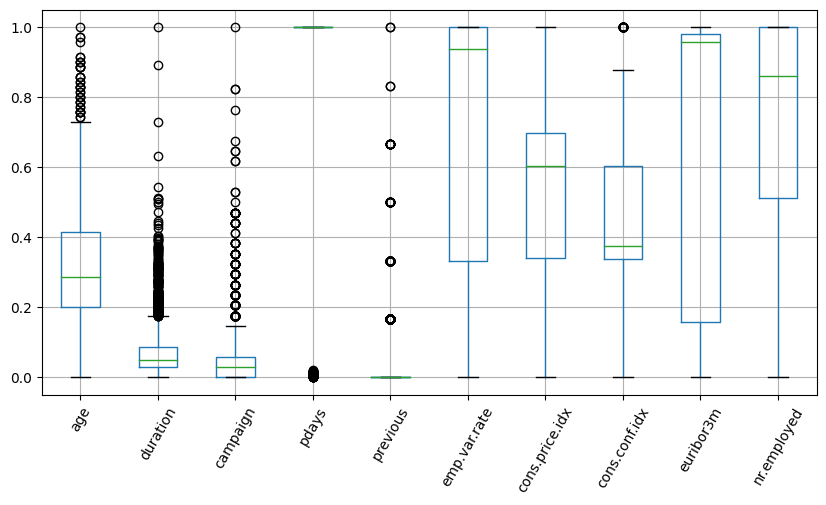

In [88]:
boxplot = df_norm.boxplot(column=list(df_norm.columns),figsize=(10,5),rot=60)
plt.show()

In [89]:
df_norm.loc[(df_norm['age'] > 0.75) 
            | (df_norm['duration'] > 0.19) 
            | (df_norm['campaign'] > 0.19)
            | (df_norm['pdays'] < 0.19)
            | (df_norm['previous'] > 0.1)
            | (df_norm['cons.conf.idx'] > 0.9),].shape[0]

1004

In [90]:
indices = df_norm.index[(df_norm['age'] > 0.75) 
            | (df_norm['duration'] > 0.19) 
            | (df_norm['campaign'] > 0.19)
            | (df_norm['pdays'] < 0.19)
            | (df_norm['previous'] > 0.1)
            | (df_norm['cons.conf.idx'] > 0.9)]
len(indices.tolist())

1004

In [91]:
import math
import scipy.stats as stats

In [92]:
z = np.abs(stats.zscore(df_norm))
z
np.where(z>3)[0].size

487

### Izbacivanje dobijenih outlier verdnosti

In [93]:
indices = np.where(z>3)[0].tolist()
df_norm.drop(index=indices, inplace=True)

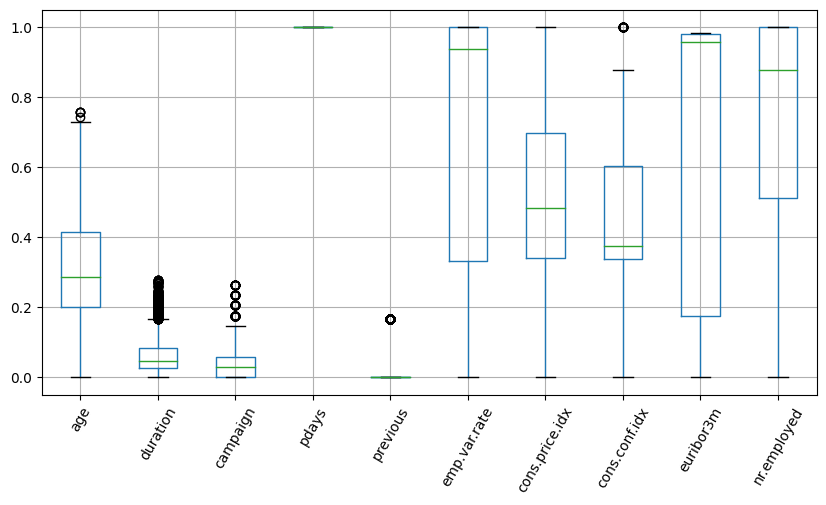

In [94]:
boxplot = df_norm.boxplot(column=list(df_norm.columns),figsize=(10,5),rot=60)
plt.show()

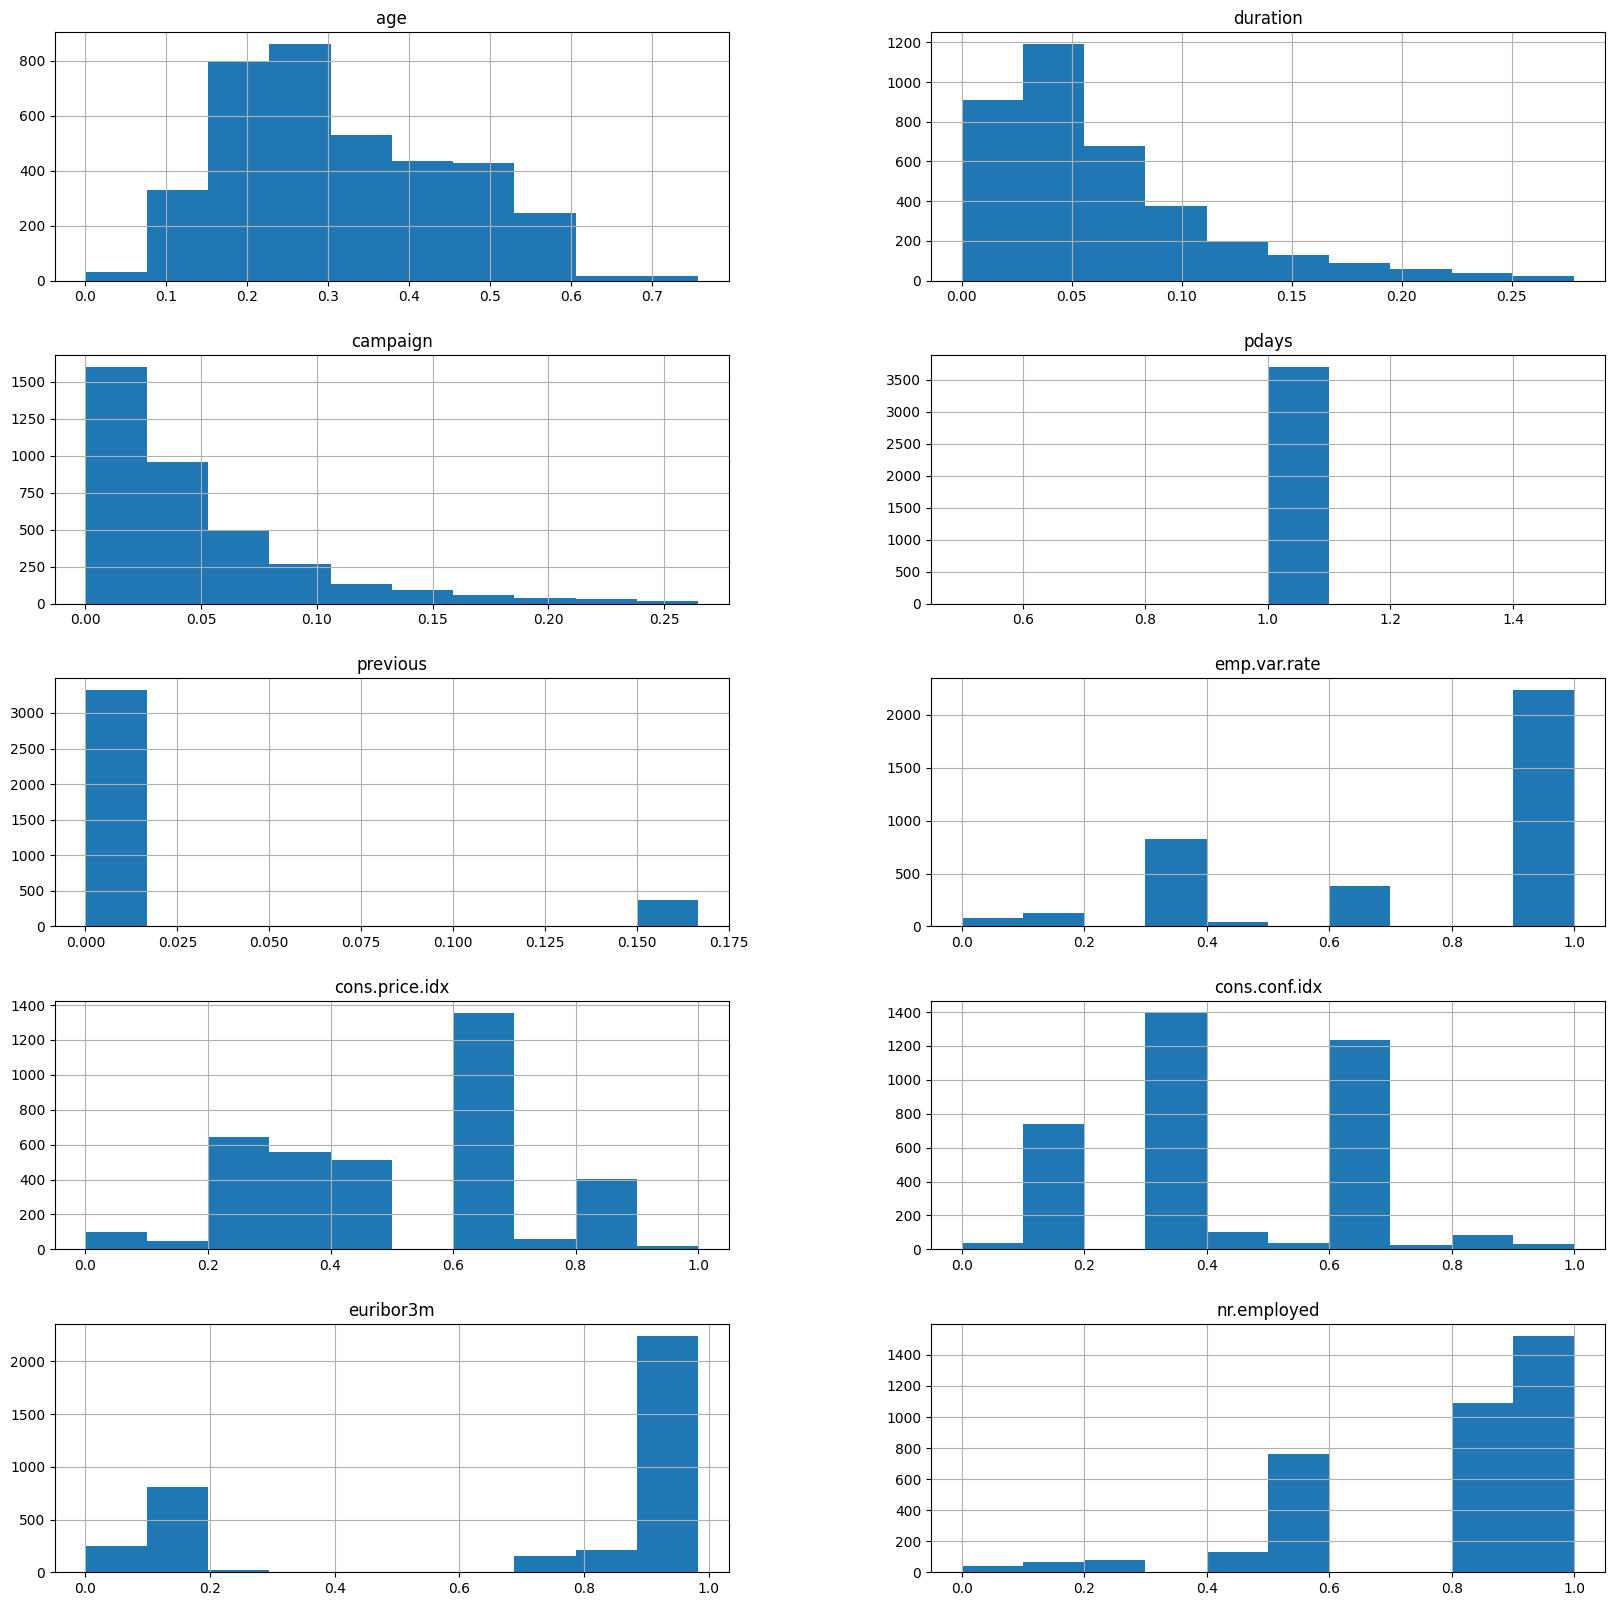

In [95]:

fig, axes = plt.subplots(5,2)
fig.set_figheight(20)
fig.set_figwidth(20)
df_norm.hist('age', ax=axes[0,0])
df_norm.hist('duration', ax=axes[0,1])
df_norm.hist('campaign', ax=axes[1,0])
df_norm.hist('pdays', ax=axes[1,1])
df_norm.hist('previous', ax=axes[2,0])
df_norm.hist('emp.var.rate', ax=axes[2,1])
df_norm.hist('cons.price.idx', ax=axes[3,0])
df_norm.hist('cons.conf.idx', ax=axes[3,1])
df_norm.hist('euribor3m', ax=axes[4,0])
df_norm.hist('nr.employed', ax=axes[4,1])



plt.show()

# KMeans 

In [96]:
df_norm.shape
df_norm.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Metoda lakta

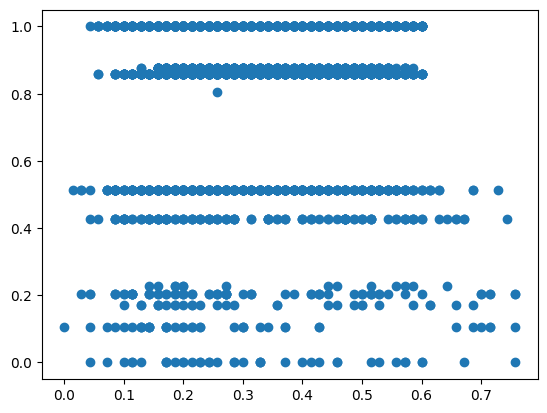

count    3696.000000
mean        0.038054
std         0.050823
min         0.000000
25%         0.000000
50%         0.029412
75%         0.058824
max         0.264706
Name: campaign, dtype: float64

In [97]:
chosen = df_norm[['age','nr.employed']]

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(chosen.iloc[:,0], chosen.iloc[:,1])
plt.show()
df_norm['campaign'].describe()

In [98]:
SSE = {}
for k in range(1, 10):
    model = KMeans(n_clusters=k, max_iter=100,n_init='auto').fit(chosen)
    klasteri = model.labels_
    SSE[k] = model.inertia_ # Inertia: predstavlja SSE (suma odstojanja instanci od odgovarajućih centroida)
SSE

{1: 300.98740303579257,
 2: 103.70051071135737,
 3: 86.63729935818854,
 4: 63.147920075254845,
 5: 42.64350820762313,
 6: 31.381658253705872,
 7: 26.31422722621794,
 8: 22.68148576676062,
 9: 18.138606190775175}

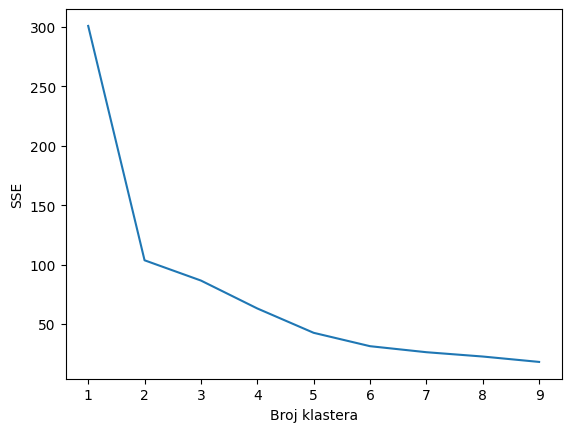

In [99]:
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Broj klastera")
plt.ylabel("SSE")
plt.show()

## Primena KMeans algoritma

In [100]:
from sklearn.cluster import KMeans

In [101]:
algoritam = KMeans(n_clusters = 2, max_iter = 100, n_init=10)

In [102]:
model = algoritam.fit(chosen)

In [103]:
centroidi = model.cluster_centers_
centroidi

array([[0.30062112, 0.43636275],
       [0.31557498, 0.94402874]])

In [104]:
pd.DataFrame(centroidi, columns = list(chosen.columns))

,age,nr.employed
0,0.300621,0.436363
1,0.315575,0.944029


In [105]:
klasteri = model.predict(chosen) 
df_norm['cluster'] = klasteri
df_norm.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster
0,0.171429,0.133681,0.029412,1.0,0.000000,0.333333,0.269680,0.192469,0.153741,0.512287,0
1,0.300000,0.094977,0.088235,1.0,0.000000,0.937500,0.698753,0.602510,0.956916,0.859735,1
2,0.100000,0.062311,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.981179,1.000000,1
3,0.285714,0.004666,0.058824,1.0,0.000000,1.000000,0.882307,0.376569,0.980499,1.000000,1
4,0.414286,0.015921,0.000000,1.0,0.000000,0.687500,0.389322,0.368201,0.806349,0.877883,1
6,0.200000,0.079605,0.088235,1.0,0.000000,0.479167,0.778644,0.556485,0.055329,0.000000,0
7,0.328571,0.012078,0.029412,1.0,0.000000,0.687500,0.389322,0.368201,0.806349,0.877883,1
8,0.185714,0.018666,0.000000,1.0,0.166667,0.687500,0.389322,0.368201,0.797732,0.877883,1
9,0.100000,0.082624,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980272,1.000000,1
10,0.257143,0.040626,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.982540,1.000000,1


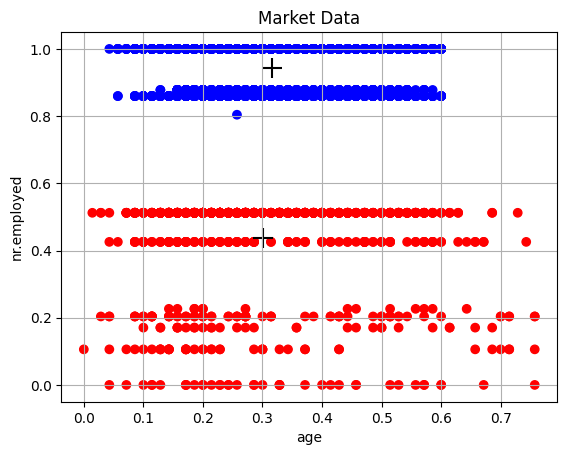

In [106]:
boja_klaster_mapa = {0: 'r', 1: 'b', 2: 'g', 3:'c', 4:'m'}
plt.close()
boja_klaster = [boja_klaster_mapa[i] for i in df_norm.cluster]

def draw_clusters(df, x, y, cluster_color, cluster_label, centers):
    plt.close()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Market Data')
    plt.scatter(df[x], df[y], c = cluster_color, label = df[cluster_label])
    plt.scatter(centers[:,0], centers[:,1], marker='+', s = 200, c = 'black')
    plt.grid()
    plt.show()
draw_clusters(df_norm, 'age', 'nr.employed', boja_klaster, 'cluster', centroidi)

### Evaluacija 

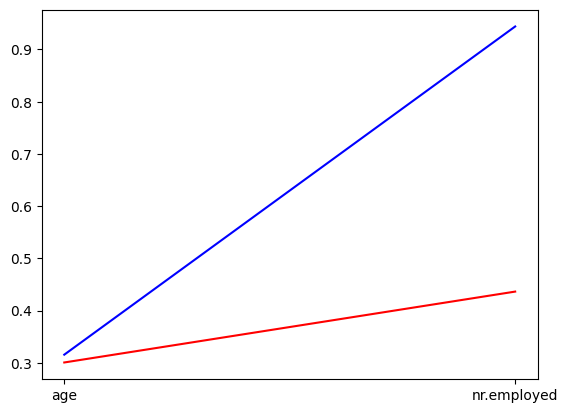

In [107]:
plt.plot(centroidi[0,:], c = 'r')
plt.plot(centroidi[1,:], c = 'b')
# plt.plot(centroidi[2,:], c = 'g')
plt.xticks(list(range(2)), list(chosen.columns))
plt.show()

### Silhouette score

In [108]:
from sklearn.metrics import silhouette_score

In [109]:
silhouette_score(chosen, list(klasteri))

0.632554164430716

### Ponovno merenje broja klastera metodom lakta

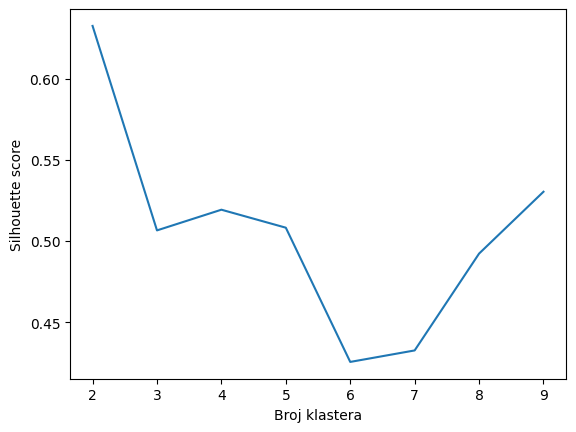

In [110]:
SSE = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k, max_iter=100, n_init='auto').fit(chosen)
    klasteri = model.fit_predict(chosen)
    SSE[k] = silhouette_score(X = chosen, labels=klasteri)
SSE

plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Broj klastera")
plt.ylabel("Silhouette score")
plt.show()

In [111]:
!pip install scikit-plot
import scikitplot as skplt

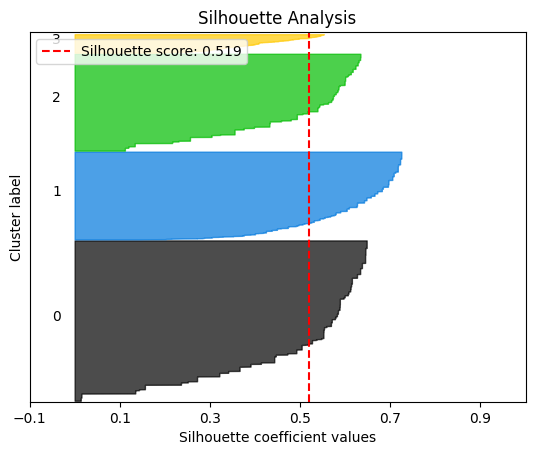

In [112]:
model = KMeans(n_clusters=4, random_state=15, n_init=10)
klasteri = model.fit_predict(chosen)
skplt.metrics.plot_silhouette(chosen, klasteri)
plt.show()

# Bonus

In [113]:
df = pd.read_csv('bank-additional.csv', sep=';')

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(df['y'])

df['y'] = target

In [115]:
df.drop(['emp.var.rate', 'euribor3m'], axis=1, inplace=True)

In [116]:
df.insert(18, 'cluster',df_norm['cluster'])

In [117]:
df.dropna(inplace=True)

In [118]:
df.drop(780, inplace=True)

In [119]:
df['nr.employed']=df['nr.employed'].astype('float64')

In [120]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,cluster,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,92.893,-46.2,5099.1,0.0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,93.994,-36.4,5191.0,1.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,94.465,-41.8,5228.1,1.0,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,94.465,-41.8,5228.1,1.0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,93.200,-42.0,5195.8,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,56,retired,married,basic.4y,unknown,no,no,cellular,jul,tue,580.0,3.0,999,0.0,nonexistent,93.918,-42.7,5228.1,1.0,0
4094,62,blue-collar,married,basic.4y,no,yes,no,cellular,nov,mon,152.0,1.0,6,1.0,success,92.649,-30.1,5017.5,1.0,0
4095,36,admin.,single,university.degree,no,no,yes,cellular,aug,fri,69.0,2.0,999,0.0,nonexistent,93.444,-36.1,5228.1,0.0,0
4096,33,services,married,high.school,no,no,no,telephone,may,mon,146.0,2.0,999,0.0,nonexistent,93.994,-36.4,5191.0,1.0,0


In [121]:
indices = list(range(1,10))+[14]

In [122]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), indices)], remainder='passthrough')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_k1 = df.iloc[:,:-1][df['cluster']==0]
X_k2 = df.iloc[:,:-1][df['cluster']==1]

y_k1 = df.iloc[:,-1][df['cluster']==0]
y_k2 = df.iloc[:,-1][df['cluster']==1]

X_k1 = ct1.fit_transform(X_k1)
X_k2 = ct1.fit_transform(X_k2)
X = ct1.fit_transform(X)


In [123]:
model = LogisticRegression()
model_k1 = LogisticRegression()
model_k2 = LogisticRegression()


model.fit(X, y)
model_k1.fit(X_k1, y_k1)
model_k2.fit(X_k2, y_k2)

LogisticRegression()

In [124]:
print('''Pocetne performanse:
---------------------------------------------
''')

print_performance(y, model.predict(X))

print('''
----------------------------------------------
Model sa prvim klasterom: 
----------------------------------------------
''')

print_performance(y_k1, model_k1.predict(X_k1))
print('''
----------------------------------------------
Model sa drugim klasterom: 
-----------------------------------------------
''')
print_performance(y_k2, model_k2.predict(X_k2))

Pocetne performanse:
---------------------------------------------

Accuracy: 0.910893778864439
Precision: 0.6481481481481481
Recall: 0.42892156862745096
F1: 0.5162241887905604

----------------------------------------------
Model sa prvim klasterom: 
----------------------------------------------

Accuracy: 0.9106145251396648
Precision: 0.654320987654321
Recall: 0.4380165289256198
F1: 0.5247524752475248

----------------------------------------------
Model sa drugim klasterom: 
-----------------------------------------------

Accuracy: 0.9152282316839279
Precision: 0.6813186813186813
Recall: 0.43205574912891986
F1: 0.5287846481876333
